# Домашнее задание 2 (5 баллов).

*Все задания ниже имеют равный вес (5/10)*

Код для импорта мы написали за вас (не благодарите, нам не трудно). Дальше код будете писать вы. 

[Тут](https://habr.com/ru/companies/ruvds/articles/494720/) шпора по pandas. За основу домашнего задания взят ноутбук [отсюда](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/) (не подглядывайте!).

In [164]:
import pandas as pd
import numpy as np

#### Описание данных

Автор д/з - плохой человек, который не стал переводить описание с мотивировкой, что весь DS на английском. Так что описание полей будет на английском:

1. Account ID
- Description: A unique identifier for each social media account in the dataset.
- Type: Integer
- Example: 1, 2, 3, …
2. Username
- Description: The username or handle of the social media account.
- Type: String
- Example: john_doe, tech_guru_22, fitness_freak
3. Platform
- Description: The social media platform the account is using (Instagram, Twitter, Facebook, TikTok, LinkedIn).
- Type: Categorical (String)
- Example: Instagram, Twitter, Facebook, TikTok, LinkedIn
4. Follower Count
- Description: The total number of followers the account has.
- Type: Integer
- Example: 1500, 245000, 78000
5. Posts Per Week
- Description: The average number of posts the account creates per week.
- Type: Integer
- Example: 3, 5, 7
6. Engagement Rate
- Description: The percentage of interactions (likes, comments, shares) relative to the follower count. This is a measure of how engaging the content is.
- Type: Float
- Range: 0.01 to 0.15
- Example: 0.045 (4.5% engagement rate)
7. Ad Spend (USD)
- Description: The monthly amount spent on advertising or promoting posts.
- Type: Float
- Example: 150.75, 850.00, 300.50
8. Conversion Rate
- Description: The percentage of users who take a desired action (e.g., clicking a link, signing up, etc.) after interacting with an ad.
- Type: Float
- Range: 0.01 to 0.05 (1% to 5% conversion rate)
- Example: 0.025 (2.5% conversion rate)
9. Campaign Reach
- Description: The total number of unique users reached by the user’s campaigns in a given month.
- Type: Integer
- Example: 5000, 20000, 15000

#### Задание 0

Подгрузите данные. Да-да, за чтение таблицы баллов не будет))

**Hint**: [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [165]:
df = pd.read_csv("data.csv")

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account ID       10000 non-null  int64  
 1   Username         10000 non-null  object 
 2   Platform         10000 non-null  object 
 3   Follower Count   10000 non-null  int64  
 4   Posts Per Week   10000 non-null  int64  
 5   Engagement Rate  10000 non-null  float64
 6   Ad Spend (USD)   10000 non-null  float64
 7   Conversion Rate  10000 non-null  float64
 8   Campaign Reach   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


#### Задание 1

Колонка `Platform` содержит название различных платформ. Давайте представим, что в них есть некоторое отношение порядка. Закодируйте каждую платформу целым числом (от 0 до N) и положите этот "код" в новую колонку `Platform_Code`. Теперь вычислите корреляцию Спирмена между всеми парами колонок в датасете (результатом будет таблица корреляций). В качестве ответа выведите значение корреляции `Platform_Code` с `Engagement Rate`. Можете после вывода числа еще коротко написать, что оно означает (нет, это не оценивается).

**Hint**: [pd.factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html), [pd.DataFrame.select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html), [pd.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [167]:
codes, platrorms = pd.factorize(df["Platform"])
df["Platform_Code"] = codes
corr = df.corr(numeric_only=True)
corr["Platform_Code"]["Engagement Rate"]

0.03470195165241881

Корреляция на уровне 3%, значит при увеличении индекса соц сети средняя вовлеченность чуть меняется. 
Проанализируем каждую соц сети отдельно, 

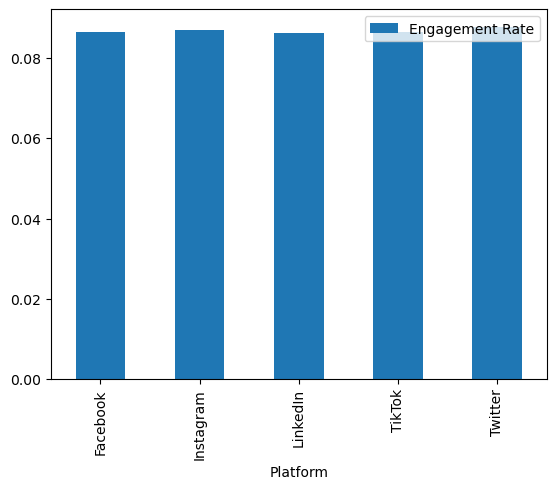

In [168]:
df.groupby("Platform")[["Engagement Rate"]].mean().plot(
    kind="bar", stacked=True
);

Получаем, что во всех соц сетях примерно одинаковая вовлеченность аудитории и датасет скучный.

#### Задание 2

Теперь посмотрите на столбец `Follower Count`. В нем какие-то числа. Иногда бывает полезно провести дискретизацию такого признака. Разбейте все значения в столбце на 4 группы: "Low", "Medium", "High", "Very High". Каждая группа включает в себя новые 25% данных. То есть, Low включает в себя 25% самых маленьких значений признака и так далее. Положите значения "Low", "Medium", "High" или "Very High" для каждого сэмпла датасета в новую колонку `Follower_Bin`. Теперь посчитайте среднее значение `Engagement Rate` для каждой категории из `Follower_Bin`. В качестве ответа выведите значение для категории "High".

**Hint**: [pd.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html), [pd.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [pd.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [242]:
%%time
labels = ["Low", "Medium", "High", "Very High"]
nbins = len(labels)

follower_bin = pd.qcut(df["Follower Count"], nbins, labels=labels)
df["Follower_Bin"] = follower_bin

engagement_raitings = df.groupby("Follower_Bin", observed=False)["Engagement Rate"].mean()
engagement_raitings["High"]

CPU times: user 17.6 ms, sys: 82.2 ms, total: 99.7 ms
Wall time: 203 ms


0.08655032

#### Задание 3

Иногда бывает полезно превратить широкую таблицу в длинную (например, для визуализаций сразу нескольких признаков на одной картинке). Да, звучит странно, но именно этим вы сейчас и займетесь. Сделайте новый датафрейм `melted_df`, в который вы поместите каждый сэмпл датасета 6 раз: по одному разу на значение из 'Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate' и 'Campaign Reach'. То есть, вы берете сэмпл из датасета (строку) и превращаете ее в 6 отдельных строк. Каждая отдельная строка в столбце `Metric` имеет имя из предложенного списка 5 признаков, а в столбце `Value` - значение данного сэмпла по этому признаку. Значение `Platform` повторяется в этих 6 строках.

Иначе говоря, 

```json
{
    "Account ID": 1,
    "Username": "harrislisa",
    "Platform": "TikTok",
    "Follower Count": 54217,
    "Posts Per Week": 3,
    "Engagement Rate": 0.0986,
    "Ad Spend (USD)": 538.1,
    "Conversion Rate": 0.049,
    "Campaign Reach": 1308,
    "Platform_Code": 0,
    "Follower_Bin": "Low"
}
```

превращается в 

```json
{
    "Platform": "TikTok",
    "Metric": "Follower Count",
    "Value": 54217,
},
{
    "Platform": "TikTok",
    "Metric": "Posts Per Week",
    "Value": 3,
}, ...
```

Для каждого уникальной пары значений (`Platform`, `Metric`) посчитайте моду среди всех значений `Value` для этой пары, результат сделайте списком и оставьте только наибольшее. В качестве ответа выведите сумму полученных мод (сумму всех значений в столбце `Value` уже после вычисления мод). Иначе говоря, выведите сумму всех мод значений для всех уникальных пар (`Platform`, `Metric`).

**Hint**: [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html), [pd.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html), [pd.DataFrameGroupBy.agg](https://pandas.pydata.org/docs/dev/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [170]:
melt_params = ['Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate', 'Campaign Reach']

melted_df = pd.melt(
    df,
    id_vars=["Platform"],
    value_vars=melt_params,
    var_name='Metric',
    value_name='Value',
)

def mode_group(group: pd.DataFrame) -> int:
    max_count = group.mode()["Value"].max()
    return max_count

melted_df_grouped = melted_df.groupby(["Platform", "Metric"]).apply(mode_group, include_groups=False)
melted_df_grouped.sum()

3100285.4716

#### Задание 4

А теперь хочется посмотреть на самые популярные аккаунты на разных платформах. Для каждой платформы отсортируйте датафрейм по убыванию количества подписчиков (`Follower Count`) - да, без циклов, сразу для всех платформ сделать сортировку, а затем оставьте только первые три записи для каждой платформы - это и будут три самых популярных аккаунта для каждой платформы. В качестве ответа выведите саму таблицу и минимальное значение `Follower Count` в ней.

**Hint**: к *groupby* можно применять функции - это эквивалентно применению функции к каждой "группе" внутри groupby-объекта. Читайте [про применение apply к датафрейму после groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#flexible-apply).

In [171]:
def group_sort(group: pd.DataFrame) -> pd.DataFrame:
    return group.sort_values(by=["Follower Count"], ascending=False).iloc[:3]

df_groupd_platorms = df.groupby("Platform").apply(group_sort, include_groups=False)
min_value = df_groupd_platorms["Follower Count"].min()

print(f"min value of that thing is: {min_value}")
df_groupd_platorms.sort_values(by=["Platform_Code"]) # not necessary sort, but good looking for me

min value of that thing is: 997512


Account ID         Username  Follower Count  Posts Per Week  \
Platform                                                                      
TikTok    5838        5839     edwardthomas          999739               7   
          4234        4235    andradewesley          999234               5   
          2575        2576     williamwyatt          998623               6   
LinkedIn  3039        3040          toneill          999055               4   
          6359        6360    andrewgregory          998968               7   
          2159        2160     ashleycooper          998925               6   
Facebook  2403        2404           eric65          999982               6   
          7350        7351     patricknoble          997915               3   
          1689        1690      chavezjason          997512               7   
Instagram 8685        8686  alexandersamuel          999726               3   
          3965        3966         lrodgers          999351               1   
          2189        2190           jbrown          997844               5   
Twitter   4920        4921      teresaellis          999919               6   
          9684        9685           sriley          999442               3   
          7576        7577       peggymunoz          998216               6   

                Engagement Rate  Ad Spend (USD)  Conversion Rate  \
Platform                                                           
TikTok    5838           0.0642          630.77           0.0325   
          4234           0.0834          872.77           0.0481   
          2575           0.0856          477.98           0.0250   
LinkedIn  3039           0.0642          799.49           0.0174   
          6359           0.1020          797.64           0.0351   
          2159           0.0856          474.46           0.0156   
Facebook  2403           0.0642          884.06           0.0281   
          7350           0.0834          429.01           0.0182   
          1689           0.0834          993.20           0.0397   
Instagram 8685           0.0834          687.61           0.0205   
          3965           0.0834          565.07           0.0335   
          2189           0.0642          505.61           0.0202   
Twitter   4920           0.0834          411.63           0.0460   
          9684           0.0834          206.84           0.0225   
          7576           0.0642          456.61           0.0456   

                Campaign Reach  Platform_Code Follower_Bin  
Platform                                                    
TikTok    5838           35523              0    Very High  
          4234           17188              0    Very High  
          2575           43299              0    Very High  
LinkedIn  3039           21862              1    Very High  
          6359           15552              1    Very High  
          2159           45956              1    Very High  
Facebook  2403           17312              2    Very High  
          7350           25985              2    Very High  
          1689           45717              2    Very High  
Instagram 8685           11050              3    Very High  
          3965           12391              3    Very High  
          2189           14717              3    Very High  
Twitter   4920            3975              4    Very High  
          9684           12783              4    Very High  
          7576           22037              4    Very High

#### Задание 5

Хочется посчитать какую-то метрику. Мы хотим посмотреть, на отношение разности суммы подписчиков аккаунтов с высокой и низкой конверсией к суммарному охвату рекламы на каждой платформе. То есть, мы делим аккаунты на две группы: высокая и низка конверсия. Затем мы смотрим на то, на сколько сильно влияние аккаунтов с высокой конверсией по сравнению с аккаунтами с низкой конверсией. 

Давайте определим *Conversion Influence* следущим образом:

$$Conversion Influence = \frac{Total Follower\ Count (High) - Total Follower\ Count (Low)}{Total Campaign Reach (High)+Total Campaign Reach (Low)}$$

Считать эту метрику мы будет для каждой `Platform`. В этой формуле High - это значения всех сэмплов датасета, в которых `Conversion Rate` больше медианы, а `Low` - не более медианы. `Total Feature` - это суммарное количество значений `Feature` либо по `High` сэмплам, либо по `Low`.

Чтобы постоянно не пересчитывать, где High. где Low, сделайте новую колонку в датасете `Conversion_Category`. Положите в нее для каждой строки либо High, либо Low.

Выведите платформу с самым большим `Conversion Influence`.

**Hint**: данное задание не про *groupby*, а скорее про [pd.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html). Сделайте сводную таблицу, по которой уже можно посчитать суммы, а затем подставить их в формулы.

In [172]:
pivot_concversion_influence = pd.pivot_table(
    df,
    index=["Platform"],
    values=["Account ID"],
    columns=["Follower_Bin"],
    aggfunc=["count"],
    observed=True,
)


pivot_concversion_influence["High_Influence"] = pivot_concversion_influence["count"]["Account ID"]["High"] + pivot_concversion_influence["count"]["Account ID"]["Very High"]
pivot_concversion_influence["Low_Influence"] = pivot_concversion_influence["count"]["Account ID"]["Low"] + pivot_concversion_influence["count"]["Account ID"]["Medium"]
pivot_concversion_influence["Conversion_Influence"] = (pivot_concversion_influence["High_Influence"] - pivot_concversion_influence["Low_Influence"]) / (pivot_concversion_influence["High_Influence"] + pivot_concversion_influence["Low_Influence"])
pivot_concversion_influence

count                       High_Influence Low_Influence  \
             Account ID                                                      
Follower_Bin        Low Medium High Very High                                
Platform                                                                     
Facebook            497    525  494       500            994          1022   
Instagram           478    511  506       502           1008           989   
LinkedIn            515    515  486       501            987          1030   
TikTok              510    482  478       498            976           992   
Twitter             500    467  536       499           1035           967   

             Conversion_Influence  
                                   
Follower_Bin                       
Platform                           
Facebook                -0.013889  
Instagram                0.009514  
LinkedIn                -0.021319  
TikTok                  -0.008130  
Twitter                  0.033966

#### Задание 6

Мы знаем, что вам понравилось считать метрики по формуле. Давайте закрепим этот успех. Теперь для каждой платформы посчитаем, на сколько эффективна реклама в разрезе трех последовательных записей в датасете. 

Для каждой платформы отсортируйте записи в порядке убывания `Posts Per Week`. Будто бы аккаунты, которые постят чаще, используют более "активные" стратегии по рекламе. Теперь посчитайте *скользущие суммы с окном 3* по `Campaign Reach` и `Ad Spend (USD)`. Скользящая сумма с окном N - это вы идете по массиву, берете все последовательные тройки записей и суммируете их. Для первых двух записей троек не найдется. Для них скользящее среднее - NaN, что нам не помешает. 

Теперь для каждого окна посчитайте 

$$Rolling Efficiency Ratio = \frac{Rolling Sum of Campaign Reach}{Rolling Sum of Ad Spend}$$

По сути, для каждого окна вы посчитаете сколько пользователе привлеклось за один доллар, потреченный на рекламу, в данном окне. Понятно, что значений будет столько, сколько окон. Нам интересно максимально значение такой эффективности для каждой платформы.

В качестве ответа выведите название платформы с наибольшей максимальной эффективность и наименьшей (два названия, не одно, не три, ровно два).

**Hint**: окна можно делать через [pd.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).

In [173]:
def calc_efficiency(g: pd.DataFrame) -> int:
    rolling_reach = g["Campaign Reach"].rolling(3).sum()
    rolling_ad = g["Ad Spend (USD)"].rolling(3).sum()
    rolling_efficiency = rolling_reach / rolling_ad
    return rolling_efficiency.max()
    

platform_efficiency = df.groupby("Platform").apply(calc_efficiency)
platform_efficiency.sort_values(inplace=True, ascending=False)

platform_best = platform_efficiency.index[0]
platform_worst = platform_efficiency.index[-1]

f"best is {platform_best} with top {platform_efficiency[platform_best]}, and worst is {platform_worst} with top {platform_efficiency[platform_worst]}"


/var/folders/bc/z2tbr02j71z_j79b47m1vkp80000gn/T/ipykernel_52482/1303806774.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  platform_efficiency = df.groupby("Platform").apply(calc_efficiency)


'best is LinkedIn with top 446.5986674343979, and worst is Twitter with top 244.07623556299149'

#### Задание 7

Это еще не все прекрасные функции pandas, которые мы хотим вам показать. Теперь вы посчитаете, сколько аккаунтов на каждой платформе одновременно лучшие по `Engagement Rate` и `Conversion Rate`.

Сделайте два отдельных суб-сета. В одном оставьте для каждой платфмормы один топовый аккаунт по `Engagement Rate`, в другом - по `Conversion Rate`. Соедините эти два подмножества по столбцу `Platform` так, что в одно строке есть описание сразу двух аккаунтов-лидеров. Теперь посмотрите равны ли имена аккаунтов в одной строке. Выведите количество строк, в которых названия аккаунтов совпадают.

In [175]:
tops = df.groupby("Platform").max().reset_index()[["Engagement Rate", "Conversion Rate", "Platform_Code"]]
df_with_tops = df.merge(tops, how="left", on="Platform_Code", suffixes=("", "_top"))

engagement_top = df_with_tops[df_with_tops["Engagement Rate"] == df_with_tops["Engagement Rate_top"]]
convertion_top = df_with_tops[df_with_tops["Conversion Rate"] == df_with_tops["Conversion Rate_top"]]
users_top = engagement_top.merge(convertion_top, how="inner", on="Account ID")
f"there are {users_top["Account ID"].count()} of cool users"


'there are 3 of cool users'

#### Задание 8

Давайте теперь что-то попроще сделаем. Например, посчитаем отношение суммарного количества подписчиков на аккаунтах с высокой конверсией к такой же сумме в аккаунтах с низкой конверсией (очевидно, для каждой платформы). По сути, мы просто хотим получить число, которое характеризует, на сколько сильно аккаунты с высокой конверсией "доминируют" над аккаунтами с низкой конверсией в плане количества подписчиков.

Высокой конверсией будем считать конверсию больше средней. Остальное - низкая. Посчитайте суммы подписчиков для каждой платформы, поделите одно на другое и выведите разницу между самым большим значением и самым маленьким, а также платформы, которые соотвутствуют этим значениям.

Используйте магическую команду `%%time`, чтобы замерить, сколько времени ушло на исполнение вашего pandas-скрипта.

In [241]:
%%time
def calc_converiton(g):
    total_high = g[g["Follower_Bin"].isin(["Very High", "High"])]
    total_high = total_high["Follower Count"].sum()
    total_low = g[g["Follower_Bin"].isin(["Medium", "Low"])]
    total_low = total_low["Follower Count"].sum()
    return total_high / total_low

df_platforms = df.groupby("Platform").apply(calc_converiton)
df_platforms.max() - df_platforms.min()

CPU times: user 17.3 ms, sys: 5.5 ms, total: 22.8 ms
Wall time: 26.3 ms


<timed exec>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


0.34645573095080895

#### Задание 9

А теперь решите задание 8 чисто питоном. Никаких функций и методов pandas. Только питоновские циклы. Замерьте время выполнения кода. Наконец, сравните время в задании 8 и 9. Напишите ниже, кто же победил: чистый python и pandas?

**Hint**: Чтобы итерироваться по датафрейму, можно из него сделать генератор через [pd.DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) или [pd.DataFrame.itertuples](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples). К слову, это не все способы итерироваться по датафрейму.

In [240]:
%%time
platforms = df["Platform"].unique().tolist()
counts = {platform: {"high": 0, "low": 0, "res": 0} for platform in platforms}

for row in df.itertuples():
    platform = row[3]
    fw_bin = "high" if row[11] in ["Very High", "High"] else "low"
    counts[platform][fw_bin] += row[4]

max_r = -100
min_r = 1e10
for plt in counts:
    r = counts[plt]["high"] / counts[plt]["low"]
    max_r = max(max_r, r)
    min_r = min(min_r, r)
    counts[plt]["res"] = r

max_r - min_r

CPU times: user 29.6 ms, sys: 3.26 ms, total: 32.9 ms
Wall time: 35.3 ms


0.34645573095080895

почему перебор вышел быстрее?
и как отказаться от `pd.apply`?

**А победителем является**: <А ТУТ МОЙ ОТВЕТ, Я ЗАМЕТИЛ, ЧТО В ЗАДАНИИ НУЖНО ЕЩЕ ЧТО-ТО НАПИСАТЬ ПОСЛЕ КОДА, ИНАЧЕ НЕ ПОЛУЧУ ПОЛНЫЙ БАЛЛ ЗА ЗАДАНИЕ>

#### Задание 10

Крайне серьезное задание. Отнеситесь к нему соответствующе. В ячейке ниже напишите ваш любимый анекдот или мем (только без баянов, окей?). Можно плохие. Помните, это задание на полный балл. Проверяющий работу ассистент должен улыбнуться.

Если вставляете картинку, то убедитесь, что вы ее не подгружаете локально. А то будет неудобно - потерять балл на этом задании, когда надо было выложить картинку на облако и прокинуть ссылку. И нет, нельзя сюда просто ссылку вставить. Либо ищите, как вставить картинку, либо смешной анекдот. Есть всего два стула - выбирайте...

---------------------------------------------------

Жуков выходит из кабинета Сталина, вытирает лоб: *"Фу, сволочь усатая..."*

Берия услышал, доложил Сталину, так, мол, и так, Жуков, выходя из вашего кабинета, **такое** сказал.

Жукова вызывают к Сталину, тот спрашивает: "Скажите, товарищ Жюков, вот ви, виходя вчера от меня, сказали "сволочь усатая". Ви _кого_ имели в виду?"

Жуков: "Гитлера, товарищ Сталин!"

Сталин вызывает Берию, пересказывает диалог: "А ви _кого_ имели в виду, товарищ Берия?"

---------------------------------------------------